In [1]:
#importing all required libraries 
import numpy as np #Need for numerical computation(if required)
import pandas as pd#Need for data manipulation,analysis and handling tabular data
import matplotlib.pyplot as plt #need for visualization

In [3]:
# Loading the cleaned data set which has already saved after the cleaning in the data cleaning part
df=pd.read_csv("02_Adidas us sales cleaned data set.csv")

In [5]:
# Exploring is data set succesfully loaded or not
print(df.head())

        retailer invoice_date     region           state           city  \
0    Foot Locker   2021-11-06  Southeast  South Carolina     Charleston   
1    Foot Locker   2020-03-14  Northeast        New York       New York   
2      West Gear   2021-01-19       West      California  San Francisco   
3        Walmart   2021-06-17  Southeast         Florida        Orlando   
4  Sports Direct   2021-09-14      South         Alabama     Birmingham   

                   product  price_per_unit  units_sold  revenue  profit  \
0    Men's Street Footwear              50         278    13900     792   
1            Men's Apparel              46         278    12788     435   
2  Men's Athletic Footwear              47         278    13066     287   
3          Women's Apparel             103         218    22454    1257   
4  Women's Street Footwear              36         278    10008     530   

  sales_method  profit_margin  
0       Online            5.7  
1       Outlet            3.4  
2 

# Explorartory Data Analysis(EDA)

In [6]:
# Exploring statistical values such as min, max, mean, etc., for selected numerical columns
print(df[["revenue", "profit", "profit_margin", "price_per_unit", "units_sold"]].describe())

            revenue        profit  profit_margin  price_per_unit   units_sold
count   9637.000000   9637.000000    9637.000000     9637.000000  9637.000000
mean   12451.621355   3440.706029      17.380722       45.218948   256.886064
std    12708.094249   5418.210200      16.301157       14.704520   214.097600
min      160.000000      8.000000       1.200000        7.000000     6.000000
25%     4068.000000    192.000000       4.500000       35.000000   106.000000
50%     7805.000000    437.000000       5.400000       45.000000   176.000000
75%    15834.000000   5200.000000      35.000000       55.000000   350.000000
max    82500.000000  39000.000000      65.000000      110.000000  1275.000000


In [7]:
# Detecting outliers using the Standard Deviation method
numerical_columns = ["revenue", "profit", "profit_margin", "price_per_unit", "units_sold"]  # Columns selected for outlier detection
for col in numerical_columns:
    mean = df[col].mean()  # Calculate the mean of the column
    std_dev = df[col].std()  # Calculate the standard deviation of the column
    lower_bound = mean - 3 * std_dev  # Define the lower threshold for outliers
    upper_bound = mean + 3 * std_dev  # Define the upper threshold for outliers
    outliers_below = df[df[col] < lower_bound]  # Identify outliers below the lower bound
    outliers_above = df[df[col] > upper_bound]  # Identify outliers above the upper bound
    
    # Print summary of outliers and statistical values
    print(f"Column: {col}")
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Outliers Below: {len(outliers_below)}")
    print(f"Outliers Above: {len(outliers_above)}")

Column: revenue
Mean: 12451.621355193525
Standard Deviation: 12708.094249217836
Lower Bound: -25672.661392459984
Upper Bound: 50575.90410284704
Outliers Below: 0
Outliers Above: 206
Column: profit
Mean: 3440.7060288471516
Standard Deviation: 5418.210200278904
Lower Bound: -12813.924571989563
Upper Bound: 19695.336629683865
Outliers Below: 0
Outliers Above: 204
Column: profit_margin
Mean: 17.380722216457404
Standard Deviation: 16.301157414758887
Lower Bound: -31.522750027819253
Upper Bound: 66.28419446073406
Outliers Below: 0
Outliers Above: 0
Column: price_per_unit
Mean: 45.21894780533361
Standard Deviation: 14.70452026287657
Lower Bound: 1.1053870167039008
Upper Bound: 89.33250859396333
Outliers Below: 0
Outliers Above: 62
Column: units_sold
Mean: 256.8860641278406
Standard Deviation: 214.0975996140144
Lower Bound: -385.4067347142026
Upper Bound: 899.1788629698838
Outliers Below: 0
Outliers Above: 154


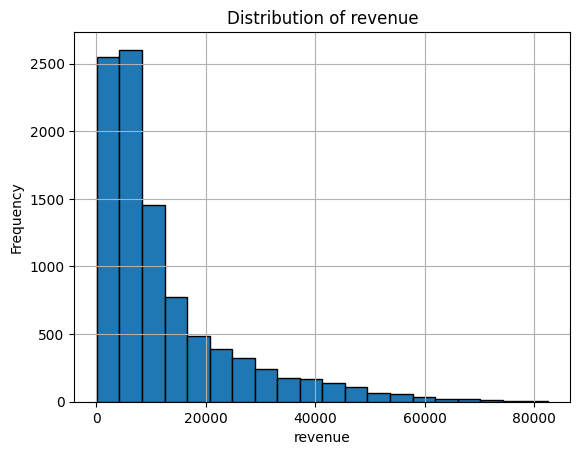

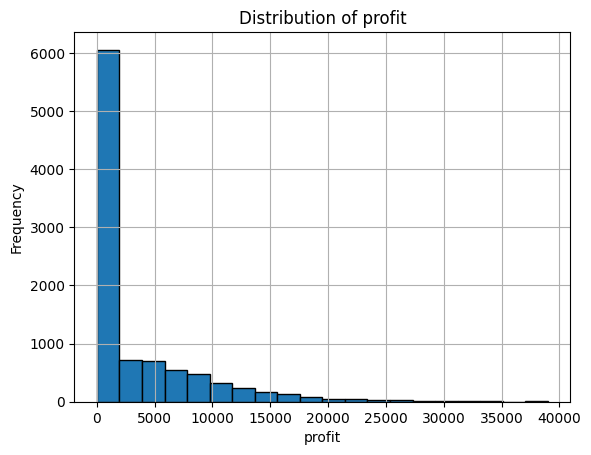

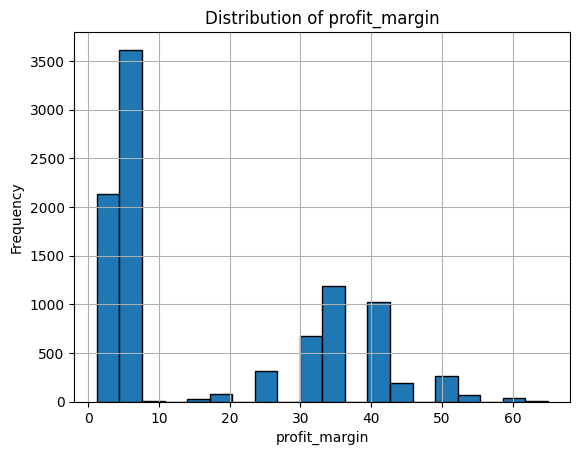

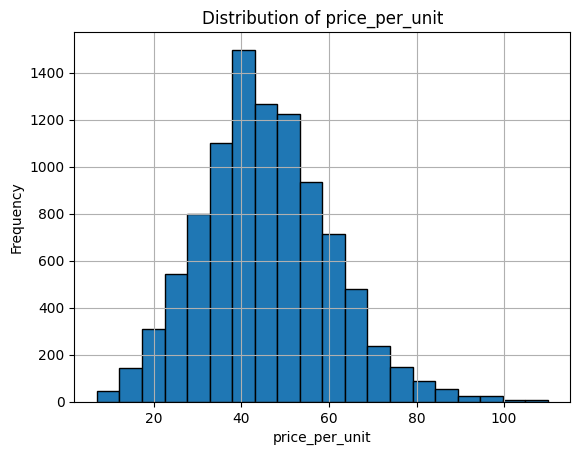

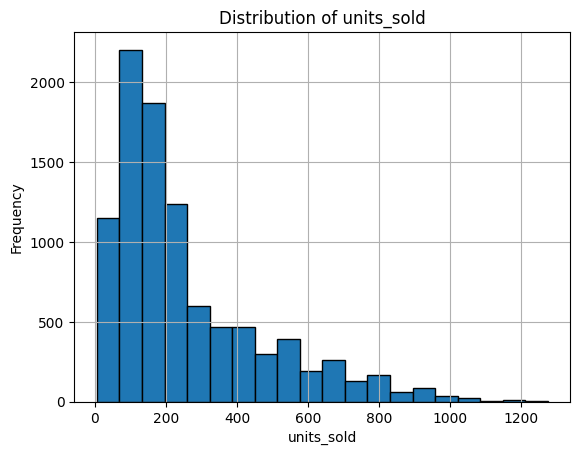

In [8]:
# Visualizing the distribution of selected numerical columns using histograms
columns_to_plot = ["revenue", "profit", "profit_margin", "price_per_unit", "units_sold"]
for i in columns_to_plot:
    plt.hist(df[i], bins=20, edgecolor="k")  # Plot histogram with bins and edge color
    plt.title(f"Distribution of {i}")  # Add a title
    plt.xlabel(i)  # Label the x-axis
    plt.ylabel("Frequency")  # Label the y-axis
    plt.grid(True)  # Add grid for better readability
    plt.show()

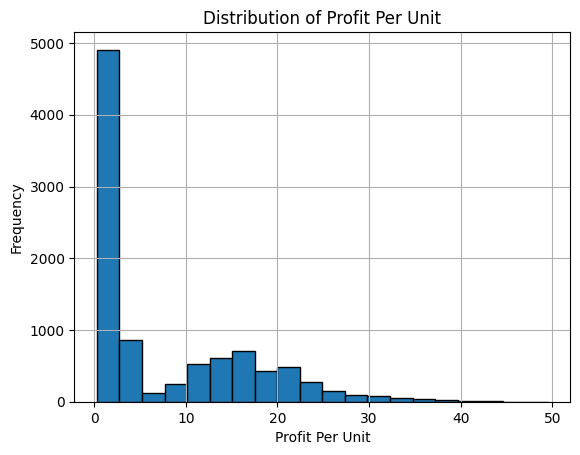

In [9]:
# Adding a new column to calculate profit per unit sold
df["profitper_unitsold"] = round(df["profit"] / df["units_sold"], 2)  # Calculate and round off to 2 decimals

# Visualizing the distribution of profit per unit sold using a histogram
plt.hist(df["profitper_unitsold"], bins=20, edgecolor="k")
plt.title("Distribution of Profit Per Unit")
plt.xlabel("Profit Per Unit")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [10]:

# Identifying the product with the highest and lowest number of units sold
dtp = df.groupby("product").agg({"units_sold": "sum"}).reset_index()  # Summing units sold by product
most_sold_product = dtp.iloc[dtp.units_sold.idxmax()]  # Identify the product with the highest sales
least_sold_product = dtp.iloc[dtp.units_sold.idxmin()]  # Identify the product with the lowest sales
print("The most sold product is:")
print(most_sold_product)
print("The least sold product is:")
print(least_sold_product)

The most sold product is:
product       Men's Street Footwear
units_sold                   593320
Name: 2, dtype: object
The least sold product is:
product       Men's Apparel
units_sold           306133
Name: 0, dtype: object


In [12]:
# Converting the 'invoice_date' column to datetime format to ensure proper date handling in future
df["invoice_date"] = pd.to_datetime(df["invoice_date"])
# Determining revenue, profit, and product sales on a month-wise basis
df1 = df.copy()  # Create a copy of the dataframe for transformation
df1["invoice_date"] = df1["invoice_date"].dt.month_name()  # Convert invoice date to month name
df1["invoice_date"] = df1["invoice_date"].astype("string")  # Ensure the column is of string type
mnthdf = df1.groupby("invoice_date").agg({"revenue": "sum", "profit": "sum", "units_sold": "sum"}).reset_index()
mnthdf.rename(columns={"invoice_date": "month", "units_sold": "product_sold"}, inplace=True)  # Rename columns for clarity

In [13]:
# Defining the correct chronological order for months
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
mnthdf["month"] = pd.Categorical(mnthdf["month"], categories=month_order, ordered=True)
mnthdf = mnthdf.sort_values("month").reset_index(drop=True)  # Sort months chronologically
print(mnthdf)

        month   revenue   profit  product_sold
0     January   9709017  2494553        227082
1    February   8263853  2139294        193959
2       March   7694984  2044006        190960
3       April   9691420  2755948        216426
4         May  10741720  2994665        214605
5        June   9783147  2664294        180564
6        July  12526794  3397257        218025
7      August  12258226  3432943        256846
8   September  10405584  3101007        228550
9     October   8538758  2507880        183001
10   November   9023440  2475583        174502
11   December  11359332  3150654        191091


In [14]:
# Identifying the month with the highest and lowest profit
high_profit_month = mnthdf[["month", "profit"]].iloc[[mnthdf.profit.idxmax()]]  # Month with highest profit
low_profit_month = mnthdf[["month", "profit"]].iloc[[mnthdf.profit.idxmin()]]  # Month with lowest profit
print("The highest profit month is:")
print(high_profit_month)
print("The lowest profit month is:")
print(low_profit_month)

The highest profit month is:
    month   profit
7  August  3432943
The lowest profit month is:
   month   profit
2  March  2044006


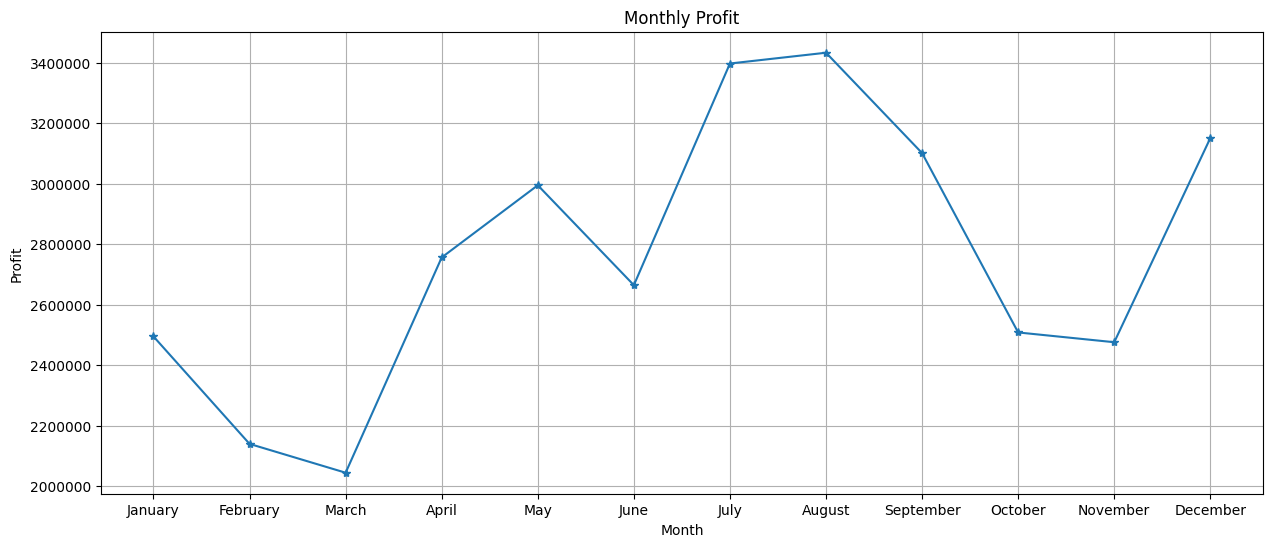

In [20]:
# Creating a line plot for monthly profit
plt.figure(figsize=(15,6))
plt.plot(mnthdf["month"], mnthdf["profit"],"*-")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.grid(True)
plt.title("Monthly Profit")
plt.ticklabel_format(style="plain", axis="y")  # Avoid scientific notation
plt.show()

In [21]:
# Identifying the month with the highest and lowest product sales
high_sales_month = mnthdf[["month", "product_sold"]].iloc[[mnthdf.product_sold.idxmax()]]  # Month with highest sales
low_sales_month = mnthdf[["month", "product_sold"]].iloc[[mnthdf.product_sold.idxmin()]]  # Month with lowest sales
print("The highest product sales month is:")
print(high_sales_month)
print("The lowest product sales month is:")
print(low_sales_month)

The highest product sales month is:
    month  product_sold
7  August        256846
The lowest product sales month is:
       month  product_sold
10  November        174502


      region   revenue   profit
0    Midwest  16654434  5274020
1  Northeast  25078267  6802150
2      South  20544731  6093344
3  Southeast  21374436  6055601
4       West  36344407  8932969


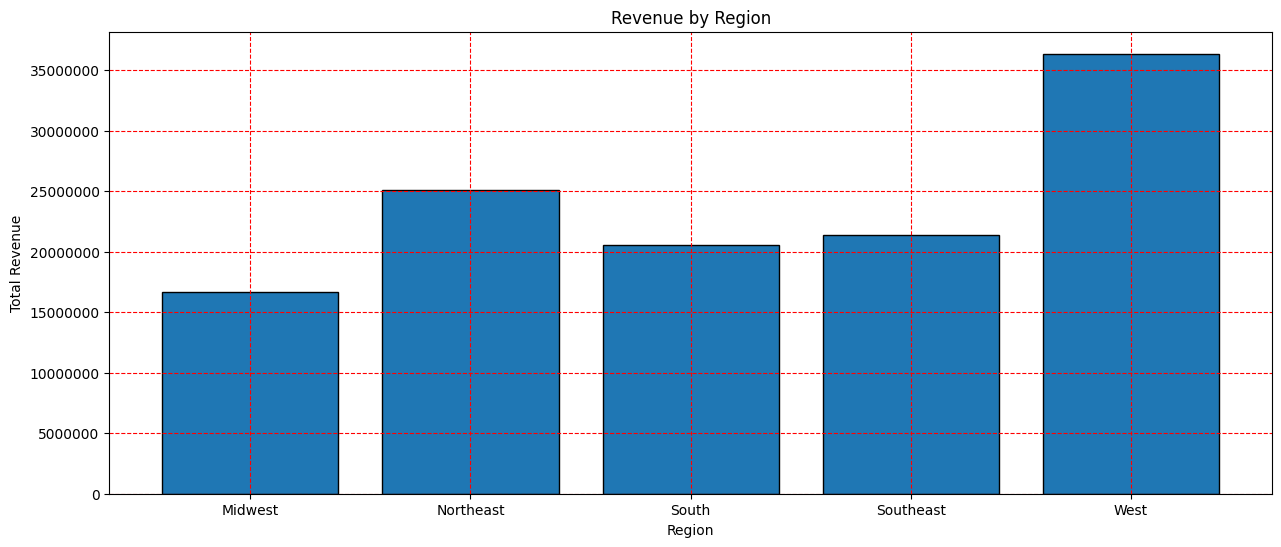

In [23]:
# Grouping data by region for regional analysis
tdf = df.groupby("region").agg({"revenue": "sum", "profit": "sum"}).reset_index()
print(tdf)

# Creating a bar chart to visualize revenue by region
plt.figure(figsize=(15,6))
plt.bar(tdf["region"], tdf["revenue"], edgecolor="k")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.title("Revenue by Region")
plt.grid(color="r", linestyle="--")
plt.ticklabel_format(style="plain", axis="y")  # Avoid scientific notation
plt.show()

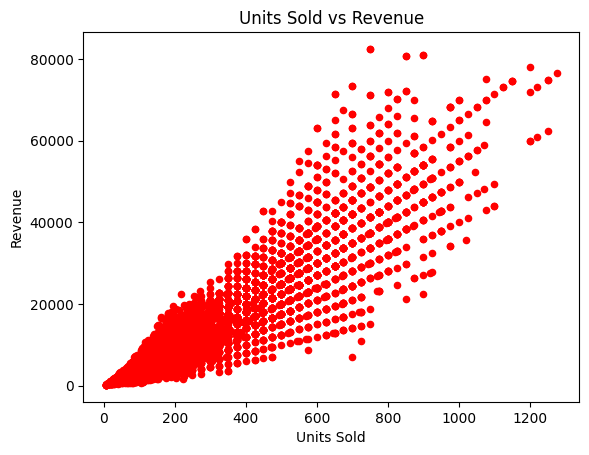

In [24]:
# Analyzing the correlation between units sold and revenue using a scatter plot
plt.scatter(df["units_sold"], df["revenue"], color="r", s=20)
plt.xlabel("Units Sold")
plt.ylabel("Revenue")
plt.title("Units Sold vs Revenue")
plt.show()